# importing the  libraries

In [1]:
 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



In [2]:

dataset = pd.read_csv("dataset.csv")

dataset

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [3]:
dataset.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
dataset.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [5]:
dataset.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [7]:
dataset.shape

(174389, 19)

## Data Exploration

In [8]:
dataset.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [9]:
dataset.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [10]:
# Dropping irrelevant columns

df = dataset.drop(columns=['id', 'release_date', 'year'])
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422
4,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,The One,0,0.0356,125.972,0.1860
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,A Little More,0,0.0360,94.710,0.2280
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,Together,0,0.0282,108.058,0.7140
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,champagne problems,69,0.0377,171.319,0.3200


In [11]:
dataset.drop_duplicates()   #will drop the duplicate rows if it is present in the dataset.

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021


## Data transformation

In [12]:

datatypes = ['float64']
    
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df.select_dtypes(include=datatypes))


In [13]:

# Elbow Method to find the optimal number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

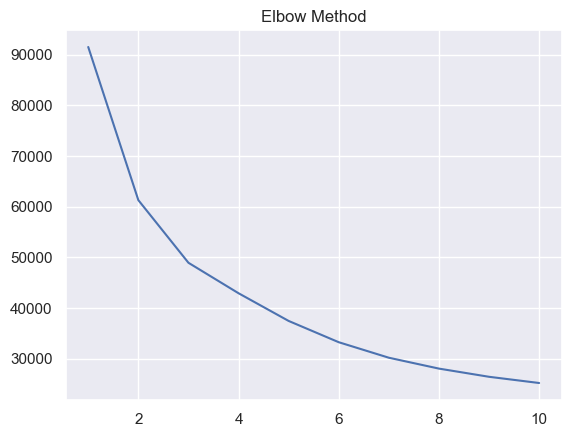

In [14]:
# Plotting the Elbow graph
sns.set()


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
  # Within-Cluster-Sum-of-Squares
plt.show()

## Applying KMeans clustering

In [15]:


# Applying KMeans clustering with the chosen number of clusters

optimal_clusters = 6  # You can choose the number of clusters based on the elbow graph

kmeans = KMeans(n_clusters = optimal_clusters)

df['cluster'] = kmeans.fit_predict(normalized_data)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Calculate Silhouette Score


silhouette = silhouette_score(normalized_data, df['cluster'])

print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette}")


Silhouette Score for 6 clusters: 0.28849496886751774


## Recommendation System

In [17]:


class MusicRecommendationSystem:
    
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, song_name, amount=1):
        
        # Find the cluster of the given song
        song_cluster = self.dataset[self.dataset['name'].str.lower() == song_name.lower()]['cluster'].values[0]

        # Get songs from the same cluster
        cluster_songs = self.dataset[self.dataset['cluster'] == song_cluster]
        cluster_songs = cluster_songs[cluster_songs['name'].str.lower() != song_name.lower()]

        # Sort by popularity 
        recommendations = cluster_songs.sort_values('popularity', ascending=False).head(amount)

        # Display selected columns
        columns = ['artists', 'name', 'popularity']
        
        return recommendations[columns]


In [18]:
# Creating an instance of the recommendation system

recommendation_system = MusicRecommendationSystem(df)

In [19]:

recommendation_system.recommend("Lovers Rock", 10)

,artists,name,popularity
19866,['Ariana Grande'],positions,96
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
39252,['Tiësto'],The Business,92
